Actividad semanal 4 : Ciencia y analítica de datos

**Equipo 143:**



> Carlos Emmanuel González - A01793488

> Enrique Ricardo García Hernández - A01315428




Profesor: Jobish Vallikavungal Devassia

Fecha: Oct 10 2022




**¿Cuál es el número de componentes mínimo y por qué?**

Se recomienda que las nuevas variables cuantitativas (que son combinaciones lineales de las variables cuantitativas anteriores normalizadas (media=0 y varianza =1) expliquen al menos el 80% de la variabilidad total del universo, el conjunto de datos originales tiene 19 variables explicativas y 1 variable respuesta.

**¿Cuál es la variación de los datos que representan esos componentes?**

Recomendamos quedarnos con 8 componentes principales, con esto explicamos ~83% de la variabilidad total del universo.
1.   El primer componente explican el: 32.7 de la variación
2.   Los primeros 2 componentes explican el: 53.0 de la variación
3.   Los primeros 8 componentes explican el: 82.9 de la variación
4.   Los primeros 10 componentes explican el: 90.1 de la variación
5.   Los primeros 15 componentes explican el: 98.5 de la variación

**¿Cuál es la pérdida de información después de realizar PCA?**

Si nos quedamos con los primeros 8 compenentes principales, explicamos el ~83% de la variación total, por lo tanto estaríamos perdiendo 17%

**De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?**

En el PC1 el top 3 son: Monto_exig_jun05, Monto_exig_may05 y Monto_exig_jul05. El bottom 3 del PC1 son Edad, Monto_prestamo (normalizado) y Monto_exig_abr05 


**¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?**
Principal Component Analysis (PCA) reduce la dimencionalidad de los datos y minimiza la perdida de información. Ayuda a encontrar las features mas significativas en un dataset y facilita el graficado en 2D y 3D. PCA ayuda a encontrar una secuencia de combinaciones lineales de variables.

El PCS Se representa como una línea recta que captura la mayoría de la variación en los datos con el menor numero de componentes lo que facilita distinguir patrones y grupos.

In [240]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
inPath = 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'

In [241]:
df = pd.read_csv(inPath, 
                 index_col = 0
                )
df.index.name = None
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


In [242]:
#Renombrando las variables
df.rename(columns = {'X1':'Monto_prestamo', 'X2': 'Genero', 'X3':'Educacion', 'X4':'Edo_Civil','X5':'Edad','X6':'Status_pago_sep05','X7':'Status_pago_ago05','X8':'Status_pago_jul05','X9':'Status_pago_jun05',
'X10':'Status_pago_may05','X11':'Status_pago_abr05','X12':'Monto_exig_sep05','X13':'Monto_exig_ago5','X14':'Monto_exig_jul05','X15':'Monto_exig_jun05','X16':'Monto_exig_may05','X17':'Monto_exig_abr05',
'X18':'Monto_pagado_sep05','X19':'Monto_exig_ago05','X20':'Monto_exig_jul05','X21':'Monto_exig_jun05','X22':'Monto_exig_may05','X23':'Monto_exig_abr05','Y':'Target'}, inplace = True)
df.head()

,Monto_prestamo,Genero,Educacion,Edo_Civil,Edad,Status_pago_sep05,Status_pago_ago05,Status_pago_jul05,Status_pago_jun05,Status_pago_may05,...,Monto_exig_jun05,Monto_exig_may05,Monto_exig_abr05,Monto_pagado_sep05,Monto_exig_ago05,Monto_exig_jul05,Monto_exig_jun05,Monto_exig_may05,Monto_exig_abr05,Target
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [243]:
ndf=df.copy() #Copiamos el dataframe original
ndf.isna().any()

Monto_prestamo        False
Genero                 True
Educacion              True
Edo_Civil              True
Edad                   True
Status_pago_sep05      True
Status_pago_ago05      True
Status_pago_jul05      True
Status_pago_jun05      True
Status_pago_may05      True
Status_pago_abr05      True
Monto_exig_sep05       True
Monto_exig_ago5        True
Monto_exig_jul05       True
Monto_exig_jun05       True
Monto_exig_may05       True
Monto_exig_abr05       True
Monto_pagado_sep05     True
Monto_exig_ago05       True
Monto_exig_jul05       True
Monto_exig_jun05       True
Monto_exig_may05       True
Monto_exig_abr05       True
Target                 True
dtype: bool

In [244]:
ndf.shape

(30000, 24)

In [245]:
#Descartando las observaciones con al menos un valor faltante
ndf.dropna(inplace = True)
ndf.shape #Se eliminaron 42 observaciones que tenían al menos 1 datos faltante ==> se eliminó el 0.14% de la base de datos ==> Podemos vivir con eso

(29958, 24)

In [246]:
#Eliminamos todas las variables categóricas así como la variable objetivo, que es Target
#ndf.drop(['Género','Educacion','Edo_Civil','Target'], axis=1)
ndf=ndf.drop(['Target','Genero','Educacion','Edo_Civil'], axis=1)
ndf.head(2)

,Monto_prestamo,Edad,Status_pago_sep05,Status_pago_ago05,Status_pago_jul05,Status_pago_jun05,Status_pago_may05,Status_pago_abr05,Monto_exig_sep05,Monto_exig_ago5,Monto_exig_jul05,Monto_exig_jun05,Monto_exig_may05,Monto_exig_abr05,Monto_pagado_sep05,Monto_exig_ago05,Monto_exig_jul05,Monto_exig_jun05,Monto_exig_may05,Monto_exig_abr05
1,20000,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
2,120000,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0


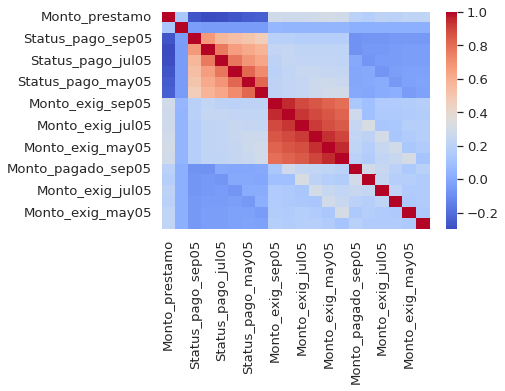

In [247]:
#Matriz de correlación sobre el dataframe original
sns.heatmap(ndf.corr().round(2),cmap = 'coolwarm') #Con base en las áreas rojas en el mapa de calor, podríamos concluir que algunas variables presentan correlación >60%

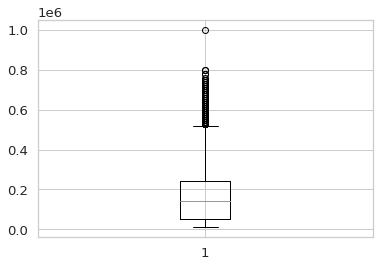

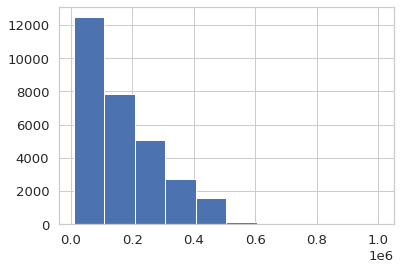

In [266]:
# Gráficas de valores atípicos o boxplot para identificar los valores atípicos.

# Creando box-plot para la variable Monto préstamo
plt.boxplot(ndf.Monto_prestamo)
plt.show()
#Histograma de las variables
plt.hist(ndf.Monto_prestamo,bins=10)
plt.show()

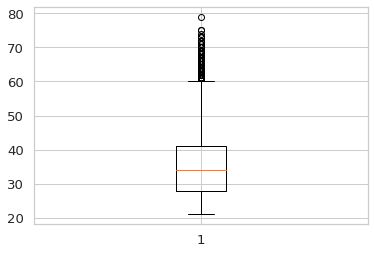

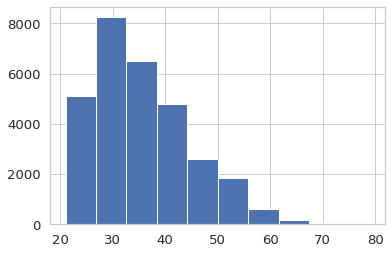

In [267]:
# Gráficas de valores atípicos o boxplot para identificar los valores atípicos.

# Creando box-plot para la variable Edad
plt.boxplot(ndf.Edad)
plt.show()

plt.hist(ndf.Edad,bins=10)
plt.show()

En el análisis visual de las variables Monto de préstamo y Edad, se observan valores que salen del rango de la variable, es decir, que están por arriba de Q3 (percentil 75), pero no por eso implican outliers, lo mismo ocurre con la distribución de la variable edad.

Esto se corregirá al normalizar las variables con media = 0 y varianza = 1

In [252]:
#normalizamos los datos
pcs = PCA()
pcs.fit(preprocessing.scale(ndf.dropna(axis=0))) 

In [227]:
pcsSummary_ndf = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })

pcsSummary_ndf = pcsSummary_ndf.transpose()
pcsSummary_ndf.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_ndf.columns) + 1)]
pcsSummary_ndf.round(4) 

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
Standard deviation,2.5572,2.0154,1.2282,1.0013,0.9608,0.9425,0.9348,0.8853,0.8560,0.8367,0.7691,0.6359,0.5098,0.5005,0.4346,0.3632,0.2649,0.2020,0.1590,0.1524
Proportion of variance,0.3269,0.2031,0.0754,0.0501,0.0462,0.0444,0.0437,0.0392,0.0366,0.0350,0.0296,0.0202,0.0130,0.0125,0.0094,0.0066,0.0035,0.0020,0.0013,0.0012
Cumulative proportion,0.3269,0.5300,0.6055,0.6556,0.7017,0.7462,0.7898,0.8290,0.8657,0.9007,0.9302,0.9505,0.9635,0.9760,0.9854,0.9920,0.9955,0.9976,0.9988,1.0000


In [228]:
print("El primer componente explica el:",((pcsSummary_ndf.iloc[2][0])*100).round(1),"de la variación")
print("Los primeros 2 componentes explican el:",((pcsSummary_ndf.iloc[2][1])*100).round(1),"de la variación")
print("Los primeros 3 componentes explican el:",((pcsSummary_ndf.iloc[2][2])*100).round(1),"de la variación")
print("Los primeros 4 componentes explican el:",((pcsSummary_ndf.iloc[2][3])*100).round(1),"de la variación")
print("Los primeros 5 componentes explican el:",((pcsSummary_ndf.iloc[2][4])*100).round(1),"de la variación")
print("Los primeros 6 componentes explican el:",((pcsSummary_ndf.iloc[2][5])*100).round(1),"de la variación")
print("Los primeros 7 componentes explican el:",((pcsSummary_ndf.iloc[2][6])*100).round(1),"de la variación")
print("Los primeros 8 componentes explican el:",((pcsSummary_ndf.iloc[2][7])*100).round(1),"de la variación")
print("Los primeros 10 componentes explican el:",((pcsSummary_ndf.iloc[2][9])*100).round(1),"de la variación")
print("Los primeros 15 componentes explican el:",((pcsSummary_ndf.iloc[2][14])*100).round(1),"de la variación")

El primer componente explica el: 32.7 de la variación
Los primeros 2 componentes explican el: 53.0 de la variación
Los primeros 3 componentes explican el: 60.5 de la variación
Los primeros 4 componentes explican el: 65.6 de la variación
Los primeros 5 componentes explican el: 70.2 de la variación
Los primeros 6 componentes explican el: 74.6 de la variación
Los primeros 7 componentes explican el: 79.0 de la variación
Los primeros 8 componentes explican el: 82.9 de la variación
Los primeros 10 componentes explican el: 90.1 de la variación
Los primeros 15 componentes explican el: 98.5 de la variación


Los dos primeros componentes principales explican ~53% de la variación de la base de datos.

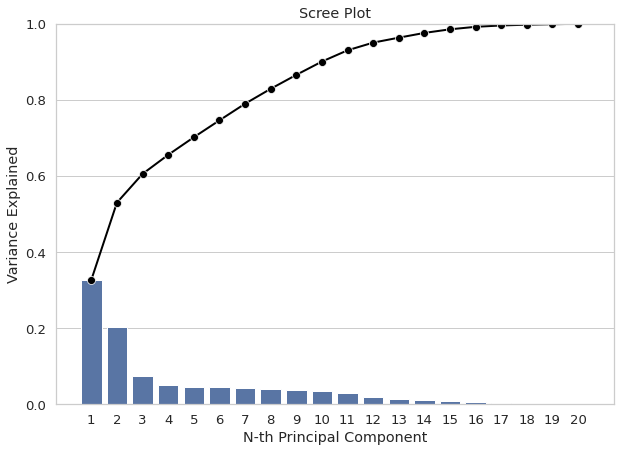

In [229]:
PC_components = np.arange(pcs.n_components_) + 1

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

In [230]:
pcsComponents_ndf = pd.DataFrame(pcs.components_.transpose(),
                                columns = pcsSummary_ndf.columns,
                                 index = ndf.iloc[:,:].columns
                                )
pcsComponents_ndf.iloc[:,:3]

,PC1,PC2,PC3
Monto_prestamo,0.069780,0.313437,0.051573
Edad,0.013010,0.067907,-0.035171
Status_pago_sep05,0.160361,-0.300810,-0.004077
Status_pago_ago05,0.193241,-0.337739,0.044682
Status_pago_jul05,0.199463,-0.347033,0.099677
Status_pago_jun05,0.206331,-0.348043,0.136655
Status_pago_may05,0.210280,-0.335178,0.155542
Status_pago_abr05,0.205797,-0.309409,0.153558
Monto_exig_sep05,0.334788,0.139942,-0.224208
Monto_exig_ago5,0.346225,0.140165,-0.193869


In [231]:
pcsComponents_ndf.PC1.idxmax()

'Monto_exig_jun05'

In [232]:
pcsComponents_ndf.PC1.nlargest(3)

Monto_exig_jun05    0.354416
Monto_exig_may05    0.352316
Monto_exig_jul05    0.350255
Name: PC1, dtype: float64

In [233]:
pcsComponents_ndf.PC1.idxmin()

'Edad'

In [237]:
pcsComponents_ndf.PC1.nsmallest(3)

Edad                0.013010
Monto_prestamo      0.069780
Monto_exig_abr05    0.070304
Name: PC1, dtype: float64

El comportamiento de pago estará asociado principalmente con los montos exigibles más reciente.

La edad es la variable que menor información que incide sobre la calidad de pago aporta, servirá para efectos de marketing, pero poco incide en la capacidad y calidad de pago


In [268]:
#Graficando las variables en los 2 primeros componentes principales
pcsComponents_ndf

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
Monto_prestamo,0.069780,0.313437,0.051573,-0.194615,-0.135536,-0.011427,-0.063919,0.062766,0.020745,-0.347981,-0.840520,0.004379,0.037824,-0.005116,0.005400,0.006053,-0.008916,0.014329,-0.001026,0.002431
Edad,0.013010,0.067907,-0.035171,-0.965201,0.131842,0.020011,0.037795,-0.040502,-0.003634,0.083033,0.185845,-0.000052,0.000850,-0.006663,-0.001243,-0.004754,0.000286,-0.001362,0.000052,0.001035
Status_pago_sep05,0.160361,-0.300810,-0.004077,-0.044294,-0.088403,0.010623,-0.010361,-0.011895,0.035982,0.565489,-0.321565,-0.608758,-0.242898,0.011869,0.135282,-0.033228,-0.005145,-0.000332,-0.002802,0.000237
Status_pago_ago05,0.193241,-0.337739,0.044682,-0.045093,-0.107884,0.006519,-0.017485,-0.003078,0.022684,0.343608,-0.194339,0.320159,0.560109,-0.059385,-0.485463,0.140151,-0.031224,0.012737,0.003320,-0.000002
Status_pago_jul05,0.199463,-0.347033,0.099677,-0.047251,-0.051315,-0.023884,-0.016868,-0.024327,-0.107018,0.067549,-0.118124,0.541808,-0.100975,-0.163690,0.606277,-0.306475,0.025296,-0.028039,-0.008470,-0.004817
Status_pago_jun05,0.206331,-0.348043,0.136655,-0.053572,-0.005521,-0.044943,0.018645,-0.044296,-0.001457,-0.237243,-0.020386,0.174576,-0.587799,0.062393,-0.225636,0.567741,0.019115,0.001802,0.014053,-0.001424
Status_pago_may05,0.210280,-0.335178,0.155542,-0.043100,0.043093,-0.013095,0.015920,0.085432,0.017791,-0.375640,0.053641,-0.175178,-0.081871,0.146726,-0.385891,-0.674041,0.027037,0.023370,-0.008263,-0.000566
Status_pago_abr05,0.205797,-0.309409,0.153558,-0.034091,0.059376,0.074924,-0.036484,0.032124,0.031555,-0.409516,0.109206,-0.362279,0.499720,0.066501,0.395197,0.318475,-0.043229,-0.012622,0.000158,0.004528
Monto_exig_sep05,0.334788,0.139942,-0.224208,0.021391,-0.050854,-0.029990,-0.050424,0.004863,0.008271,0.068142,0.032703,0.077701,0.035803,0.549889,0.051352,0.013268,0.414465,-0.432305,-0.183894,-0.317456
Monto_exig_ago5,0.346225,0.140165,-0.193869,0.033234,0.019596,-0.078866,-0.041205,-0.042245,-0.134283,0.057156,0.038359,0.053410,0.016899,0.370117,0.052439,-0.000900,0.039635,0.343710,0.329477,0.646373


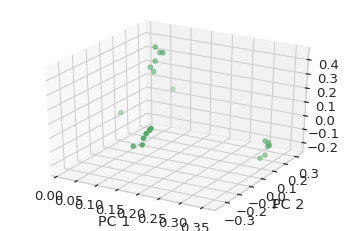

In [300]:
import matplotlib.pyplot as plt
data_paso=pcsComponents_ndf[['PC1', 'PC2','PC3']]

# Creamos la figura
fig = plt.figure()
# Creamos el plano 3D
ax1 = fig.add_subplot(111, projection='3d')
# Agregamos los puntos en el plano 3D
ax1.scatter(data_paso['PC1'],data_paso['PC2'],data_paso['PC3'], c='g', marker='o')
plt.xlabel('PC 1')
plt.ylabel('PC 2')

# Mostramos el gráfico
plt.show()

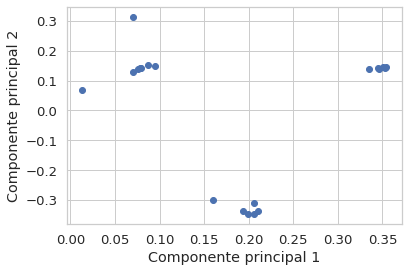

In [301]:
#En 2 dimensiones
plt.scatter(x=data_paso['PC1'],y=data_paso['PC2'])
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2');
plt.show()